# Predicting Heart Disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease based on their medical attributes

The approach will follow the next steps:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, it is possible to predict wheter the patient has a heart disease?

## 2. Data

**Context**
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

Original from: https://archive.ics.uci.edu/ml/datasets/Heart%20Disease <br>
Kaggle version: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## 3. Evaluation

> If we can reach 95% of accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

**Create a data dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment   
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    
14. label condition: 0 = no disease, 1 = disease

### Preparing the tools

In [1]:
# Import all the tools we need
# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro

%matplotlib inline

# The colour style
plt.style.use("dark_background")
import warnings
warnings.filterwarnings('ignore')

# Models from SciKit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape 
# Rows, Columns

(303, 14)

In [5]:
df.info()
# Shorter for len(df), df.dtypes, ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

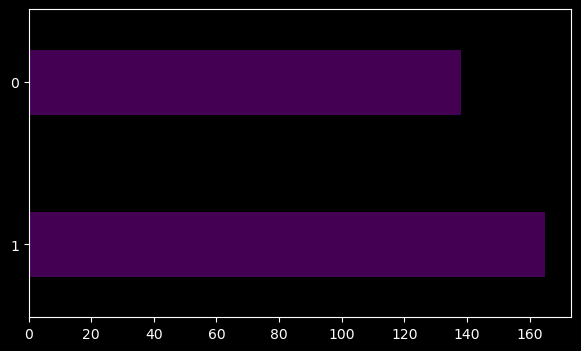

In [7]:
df.target.value_counts().plot(kind="barh",
                              figsize=(7, 4),
                              cmap="viridis",
                              width=0.4).set(facecolor="none");
# 0 is heart-healthy and 1 is heart-disease

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [9]:
df.sex.value_counts()
# 0 is Female and 1 is Male

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)
# 0 is Female and 1 is Male
# 0 is heart-healthy and 1 is heart-disease

sex,0,1
target,,
0,24,114
1,72,93


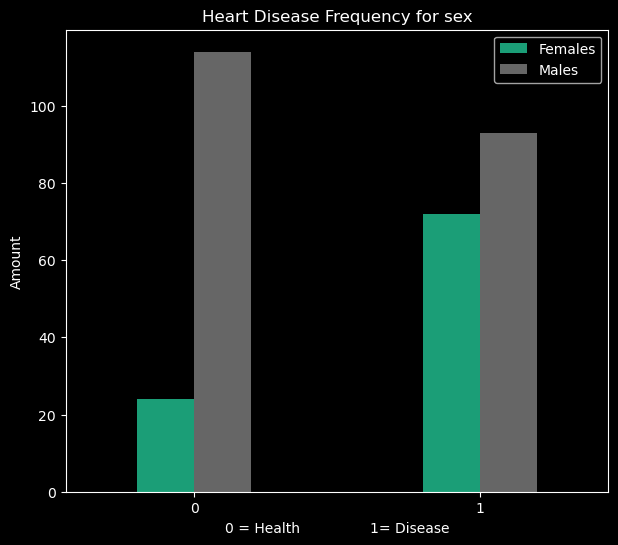

In [11]:
# Create a plot of crosstab
ax = pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(7, 6),
                                    cmap="Dark2",
                                    width=0.4)
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = Health                1= Disease")
plt.ylabel("Amount")
ax.legend(labels=["Females", "Males"])
plt.xticks(rotation=0);

### Age VS Heart Rate for Heart Disease

In [12]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

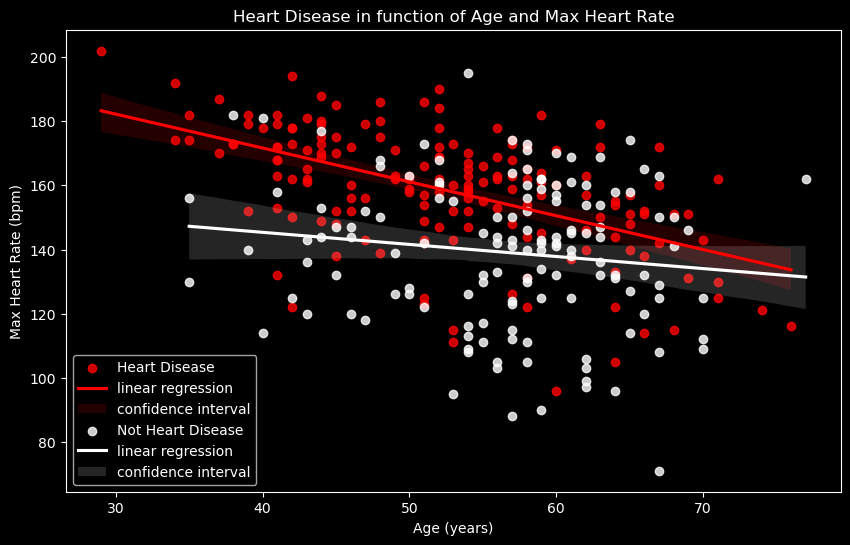

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df.age[df.target==1], y=df.thalach[df.target==1], color="r");
sns.regplot(x=df.age[df.target==0], y=df.thalach[df.target==0], color="w");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.legend(labels=["Heart Disease", "linear regression", "confidence interval", "Not Heart Disease", "linear regression", "confidence interval"])
plt.xlabel("Age (years)")
plt.ylabel("Max Heart Rate (bpm)");

### Check the distribution of the Age with an histogram

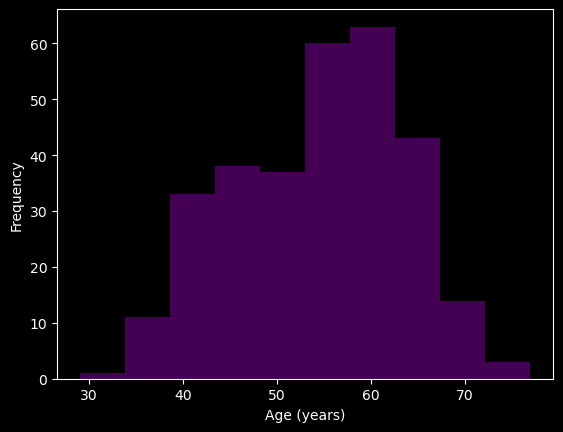

In [14]:
df.age.plot(kind="hist", cmap="viridis");
plt.xlabel("Age (years)");

### Check if the Age distribution is Normal

In [15]:
stat, p = shapiro(df['age'])

print('Statistic = %.3f, P-value = %.3f' % (stat, p))

significance_level = 0.05
if p > significance_level:
    print("The distribution of the sample is normal")
else:
    print("The distribution of the sample is not normal")

Statistic = 0.986, P-value = 0.006
The distribution of the sample is not normal


### Heart Disease Frequency per Chest Pain Type

cp: chest pain type

    Value 0: typical angina
    Value 1: atypical angina
    Value 2: non-anginal pain
    Value 3: asymptomatic

In [16]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


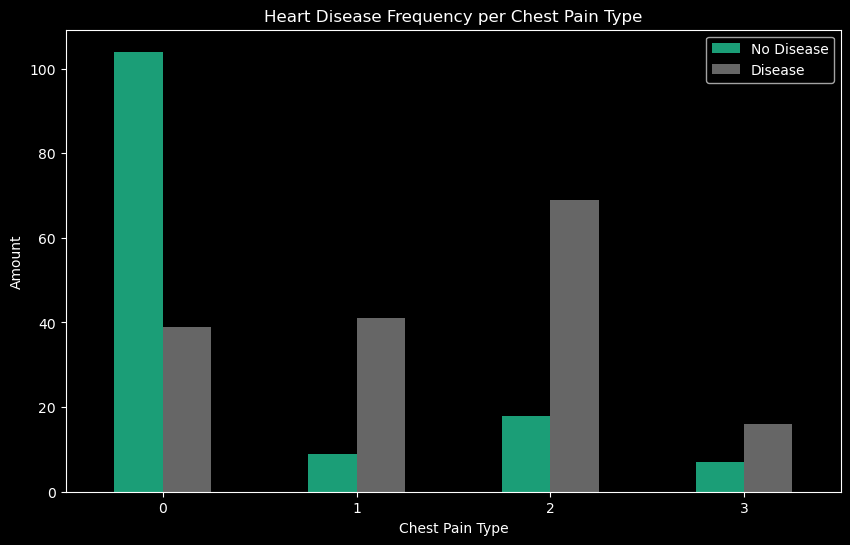

In [17]:
ax = pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), cmap="Dark2")
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
ax.legend(labels=["No Disease", "Disease"])
plt.xticks(rotation=0);

### Make a Correlation Matrix

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


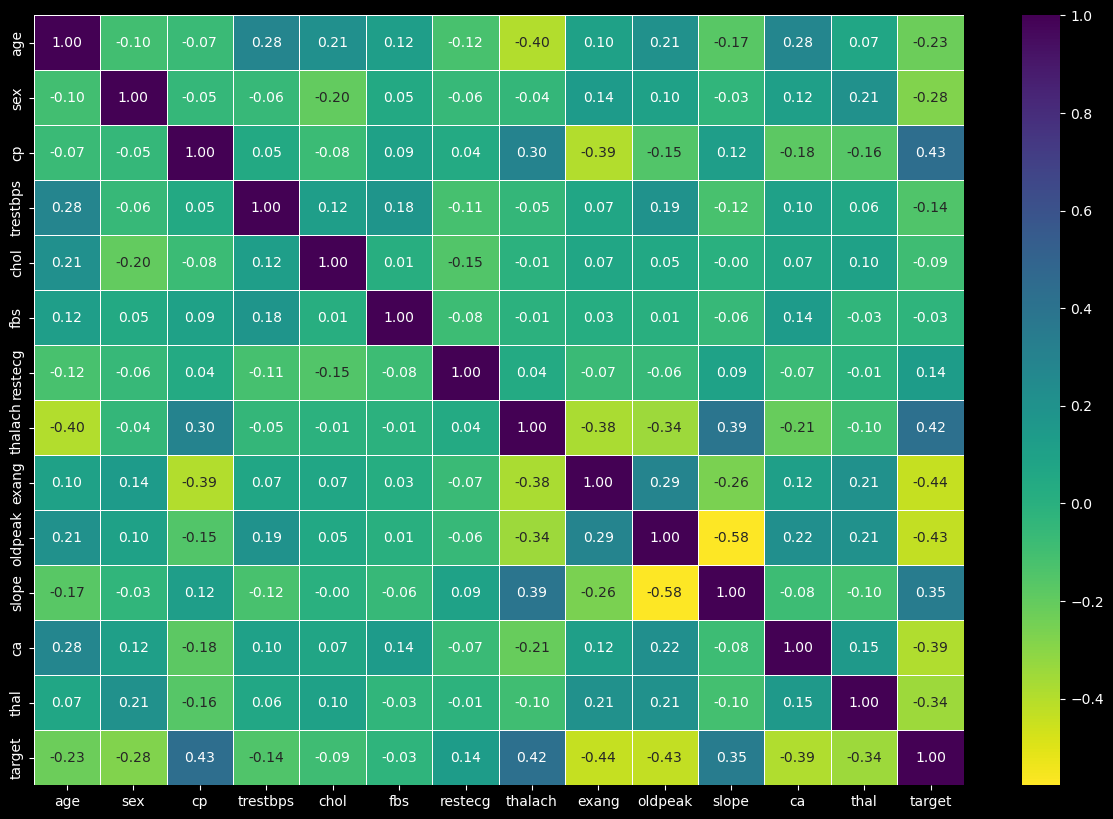

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="viridis_r");

## 5. Modelling

In [20]:
X = df.drop("target", axis=1)
y = df.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model Comparison

`DecisionTreeClassifier()` <br>
`RandomForestClassifier()` <br>
`SVC(kernel="rbf")` <br>
`SVC(kernel="linear")` <br>
`KNeighborsClassifier()` <br>
`LogisticRegression()`

In [22]:
models = {"dtc": DecisionTreeClassifier(),
          "rfc": RandomForestClassifier(),
          "svcr": SVC(kernel="rbf"),
          "svcl": SVC(kernel="linear"),
          "knc": KNeighborsClassifier(),
          "logr": LogisticRegression()}

In [23]:
def fit_and_score(models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = round(model.score(X_test, y_test), 2)
    return model_scores        

In [24]:
model_scores = fit_and_score(models=models)

### Precision of the different Baseline models

In [25]:
model_bsln_df = pd.DataFrame(model_scores.items(), columns=["Model", "Score"])

In [26]:
model_bsln_df

,Model,Score
0,dtc,0.77
1,rfc,0.80
2,svcr,0.70
3,svcl,0.85
4,knc,0.66
5,logr,0.82


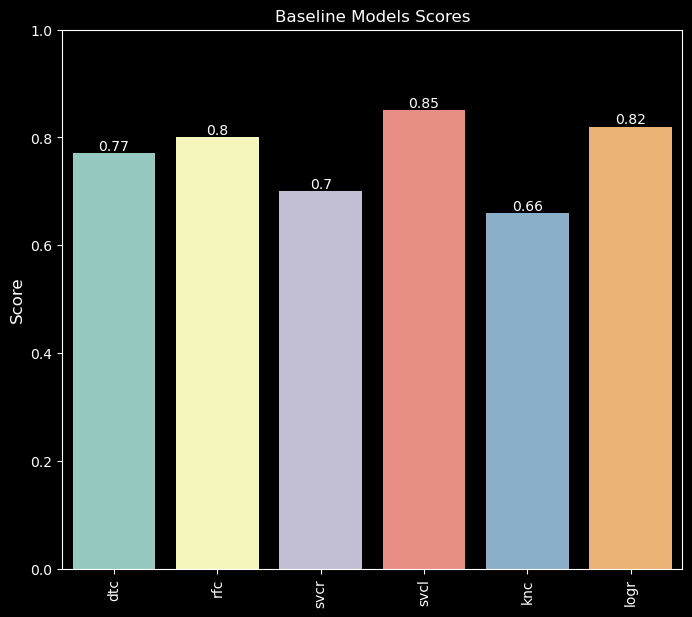

In [27]:
xaxis = model_bsln_df.Model
yaxis = model_bsln_df.Score

fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(x=xaxis, y=yaxis, ax=ax)
ax.bar_label(ax.containers[0], label_type="edge")
ax.set_title("Baseline Models Scores")
ax.set_ylim(0, 1)
ax.set_xticklabels(labels=xaxis, rotation=90)
ax.set_ylabel("Score", fontsize=12)
ax.set_xlabel("")
plt.show()

The model that predicts the best is **`Logistic Regression`**

To test the improvement of the models:

* Hyperparameter Tuning
* Feature Importance

### Hyperparameter tuning with `RandomizedSearchCV`

In [28]:
models

{'dtc': DecisionTreeClassifier(),
 'rfc': RandomForestClassifier(),
 'svcr': SVC(),
 'svcl': SVC(kernel='linear'),
 'knc': KNeighborsClassifier(),
 'logr': LogisticRegression()}

In [29]:
grids = {"dtc": {"max_depth": [3, 4, 5],
                "min_samples_split": [2, 3, 4],
                "min_samples_leaf": [1, 2, 3]},
         "rfc": {"n_estimators": np.arange(10, 1000, 50),
                "max_depth": [None, 3, 5, 10],
                "min_samples_split": np.arange(2, 20, 2),
                "min_samples_leaf": np.arange(1, 20, 2)},
         "svcr": {"C": [0.1, 1, 10],
                  "gamma": [0.1, 1, 10],
                  "class_weight": [None, 'balanced']},
         "svcl": {"C": [0.1, 1, 10],
                  "class_weight": [None, 'balanced']},
         "knc": {"n_neighbors": np.arange(1, 20, 1)},
         "logr": {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"],
                "penalty": ["l1", "l2"]}}      

In [30]:
def rs_modelizing(models, grids, X_test=X_test, X_train=X_train, y_test=y_test, y_train=y_train):
    rs_model_scores = {}
    rs_best_params = {}
    for name, model in models.items():
        grid = grids[name]
        rs_model = RandomizedSearchCV(model,
                                      n_jobs=-1,
                                      param_distributions=grid,
                                      n_iter=100,
                                      cv=5,
                                      verbose=True)
        rs_model.fit(X_train, y_train)
        rs_best_params[name] = rs_model.best_params_
        rs_model_scores[name] = round(rs_model.score(X_test, y_test), 2)
    return rs_best_params, rs_model_scores

In [31]:
rs_best_params, rs_model_scores = rs_modelizing(models=models, grids=grids)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 19 candidates, totalling 95 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [32]:
rs_best_params

{'dtc': {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 5},
 'rfc': {'n_estimators': 160,
  'min_samples_split': 16,
  'min_samples_leaf': 5,
  'max_depth': 5},
 'svcr': {'gamma': 0.1, 'class_weight': None, 'C': 0.1},
 'svcl': {'class_weight': None, 'C': 0.1},
 'knc': {'n_neighbors': 11},
 'logr': {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.615848211066026}}

In [33]:
model_random_df = pd.DataFrame(rs_model_scores.items(), columns=["Model", "Score"])

In [34]:
model_random_df

,Model,Score
0,dtc,0.74
1,rfc,0.79
2,svcr,0.59
3,svcl,0.85
4,knc,0.57
5,logr,0.84


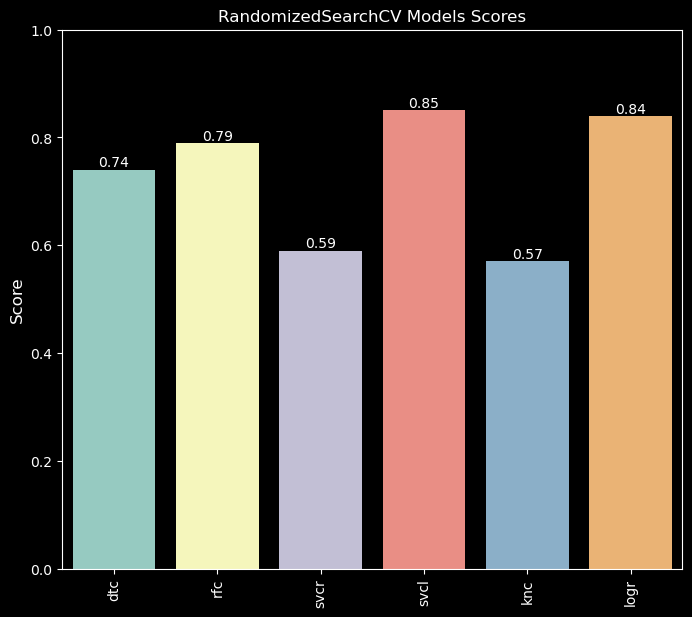

In [35]:
xaxis = model_random_df.Model
yaxis = model_random_df.Score

fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(x=xaxis, y=yaxis, ax=ax)
ax.bar_label(ax.containers[0], label_type="edge")
ax.set_title("RandomizedSearchCV Models Scores")
ax.set_ylim(0, 1)
ax.set_xticklabels(labels=xaxis, rotation=90)
ax.set_ylabel("Score", fontsize=12)
ax.set_xlabel("")
plt.show()

The model that predicts the best is BSLN's **`Logistic Regression`**

### Hyperparameter tuning with `GridSearchCV`

In [36]:
models

{'dtc': DecisionTreeClassifier(),
 'rfc': RandomForestClassifier(),
 'svcr': SVC(),
 'svcl': SVC(kernel='linear'),
 'knc': KNeighborsClassifier(),
 'logr': LogisticRegression()}

In [37]:
grids = {"dtc": {"max_depth": [3, 4, 5],
                "min_samples_split": [2, 3, 4],
                "min_samples_leaf": [1, 2, 3]},
         "rfc": {"n_estimators": [10, 50],
                "max_depth": [None, 3],
                "min_samples_split": np.arange(1, 20, 5),
                "min_samples_leaf": np.arange(1, 20, 5)},
         "svcr": {"C": [0.1, 1, 10],
                  "gamma": [0.1, 1, 10],
                  "class_weight": [None, 'balanced']},
         "svcl": {"C": [0.1, 1, 10],
                  "class_weight": [None, 'balanced']},
         "knc": {"n_neighbors": np.arange(1, 20, 1)},
         "logr": {"C": np.logspace(-4, 4, 30), 
                "solver": ["liblinear"],
                "penalty": ["l1", "l2"]}}    

In [38]:
def gs_modelizing(models, grids, X_test=X_test, X_train=X_train, y_test=y_test, y_train=y_train):
    gs_model_scores = {}
    gs_best_params = {}
    for name, model in models.items():
        grid = grids[name]
        gs_model = GridSearchCV(model,
                                param_grid=grid,
                                n_jobs=-1,
                                cv=5,
                                verbose=True)
        gs_model.fit(X_train, y_train)
        gs_best_params[name] = gs_model.best_params_
        gs_model_scores[name] = round(gs_model.score(X_test, y_test), 2)
    return gs_best_params, gs_model_scores

In [39]:
gs_best_params, gs_model_scores = gs_modelizing(models=models, grids=grids)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 19 candidates, totalling 95 fits
Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [40]:
gs_best_params

{'dtc': {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2},
 'rfc': {'max_depth': 3,
  'min_samples_leaf': 11,
  'min_samples_split': 11,
  'n_estimators': 10},
 'svcr': {'C': 0.1, 'class_weight': None, 'gamma': 0.1},
 'svcl': {'C': 0.1, 'class_weight': None},
 'knc': {'n_neighbors': 11},
 'logr': {'C': 0.38566204211634725, 'penalty': 'l2', 'solver': 'liblinear'}}

In [41]:
model_grid_df = pd.DataFrame(gs_model_scores.items(), columns=["Model", "Score"])

In [42]:
model_grid_df

,Model,Score
0,dtc,0.72
1,rfc,0.82
2,svcr,0.59
3,svcl,0.85
4,knc,0.57
5,logr,0.84


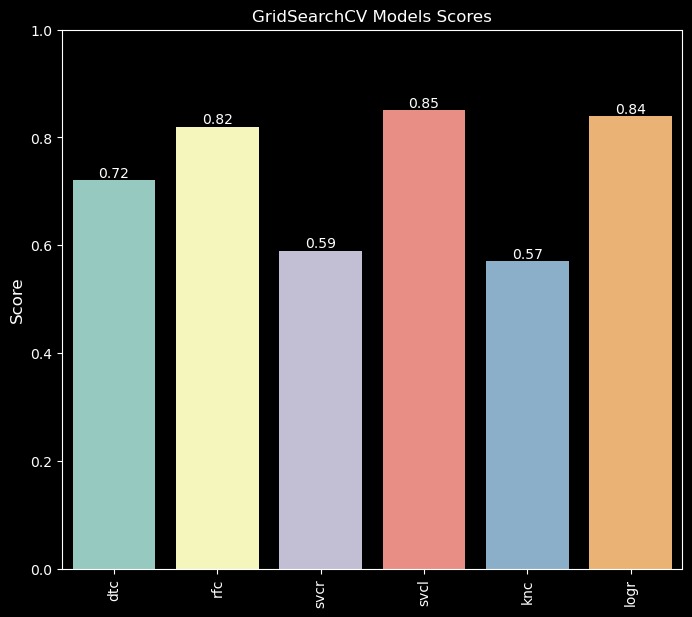

In [43]:
xaxis = model_grid_df.Model
yaxis = model_grid_df.Score

fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(x=xaxis, y=yaxis, ax=ax)
ax.bar_label(ax.containers[0], label_type="edge")
ax.set_title("GridSearchCV Models Scores")
ax.set_ylim(0, 1)
ax.set_xticklabels(labels=xaxis, rotation=90)
ax.set_ylabel("Score", fontsize=12)
ax.set_xlabel("")
plt.show()

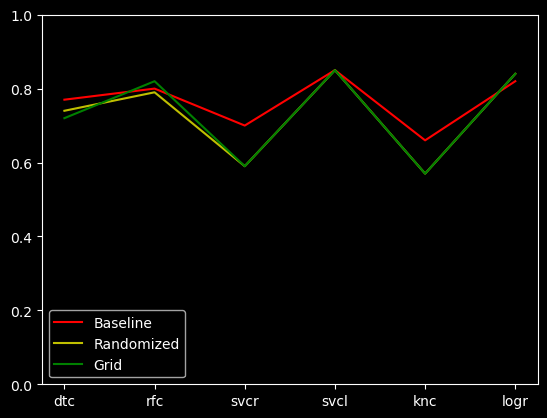

In [44]:
xax = model_bsln_df.Model
y1 = model_bsln_df.Score
y2 = model_random_df.Score
y3 = model_grid_df.Score

plt.plot(xax, y1, label="Baseline", color="r")
plt.ylim(0, 1)
plt.plot(xax, y2, label="Randomized", color="y")
plt.plot(xax, y3, label="Grid", color="g")
plt.legend();

The model that predicts the best is still BSLN's **`Logistic Regression`**

## ML model Evaluation

To perform specific Analysis for Classification Methods:

* Confusion Matrix
* Precision
* Recall
* F1 score
* Classification Score
* ROC curve and Area Under the Curve (AUC)

In [45]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f"Score: {lr.score(X_test, y_test)*100:.2f}%")

Score: 81.97%


In [46]:
y_pred = lr.predict(X_test)

**ROC curve and AUC score**

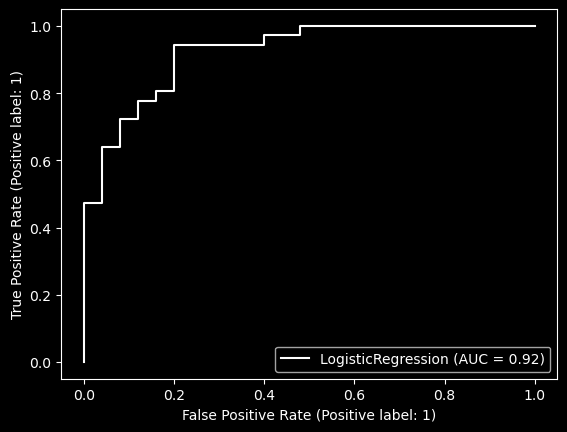

In [47]:
RocCurveDisplay.from_estimator(estimator=lr, X=X_test, y=y_test, c="w");

**Confusion Matrix**

In [48]:
confusion_matrix(y_test, y_pred)

array([[21,  4],
       [ 7, 29]], dtype=int64)

In [49]:
def plot_conf_matrix(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False).set(xlabel="True", ylabel="Predicted")

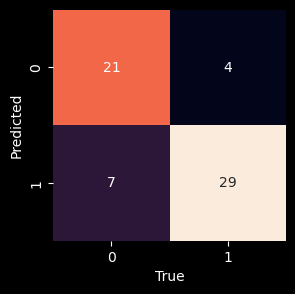

In [50]:
plot_conf_matrix(y_test, y_pred)

<span style="color:pink">True Negative:<br>
&emsp;pred=0<br>
&emsp;true=0<br>
&emsp;&emsp;{20}</span><br>
<span style="color:purple">False Negative:<br> 
&emsp;pred=0<br>
&emsp;True=1<br> 
&emsp;&emsp;{6}</span><br>
<span style="color:darkblue">False Positive:<br> 
&emsp;pred=1<br>
&emsp;True=0<br> 
&emsp;&emsp;{1}</span><br>
<span style="color:white">True Positive:<br>
&emsp;pred=1<br>
&emsp;True=1<br> 
&emsp;&emsp;{34}</span>

**Cross-Validated Precision, Recall and F1-score**

In [51]:
# Classification Report without Cross-Validation

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.88      0.81      0.84        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



**Evaluation Metrics using Cross-Validation**

In [52]:
clf = LogisticRegression()

In [53]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy");
cv_acc = np.mean(cv_acc)
cv_acc

0.8281967213114754

In [54]:
cv_pre = cross_val_score(clf, X, y, cv=5, scoring="precision");
cv_pre = np.mean(cv_pre)
cv_pre

0.8207948000932122

In [55]:
cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall");
cv_rec = np.mean(cv_rec)
cv_rec

0.8848484848484848

In [56]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1");
cv_f1 = np.mean(cv_f1)
cv_f1

0.8499655659325531

In [57]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_pre,
                           "Recall": cv_rec,
                           "F1-score": cv_f1},
                           index=[0])

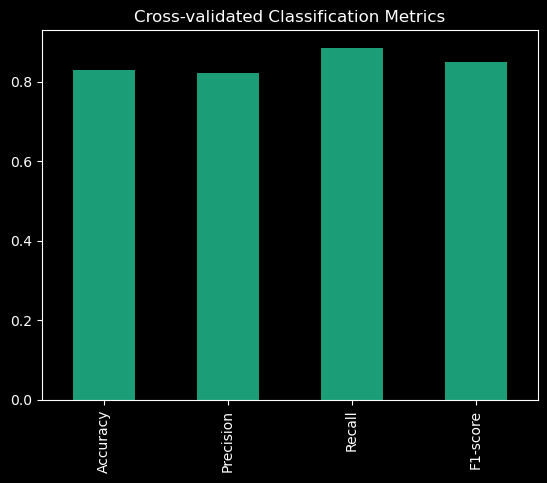

In [58]:
cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics",
                      legend=False,
                      cmap="Dark2");

## 6. Experimentation

### Feature Importance

Describe the features that contribute most to the model and define how they contribute.

Finding Feature importance is different with each ML model.

In [59]:
# Fit an instance of LogisticRegression()

clf = LogisticRegression(C=0.20433597178569418, 
                         solver="liblinear")
clf.fit(X_train, y_train);

In [60]:
# Check coef
clf.coef_

array([[-6.24196772e-03, -8.44194319e-01,  7.15755895e-01,
        -1.54458079e-02,  1.76256954e-05, -1.26379979e-01,
         3.60839566e-01,  2.84146578e-02, -5.86684193e-01,
        -4.60141389e-01,  3.00454506e-01, -5.44438345e-01,
        -6.63948528e-01]])

In [61]:
# Each value of the list correspond to the coeficient for each column
# Match coef's to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

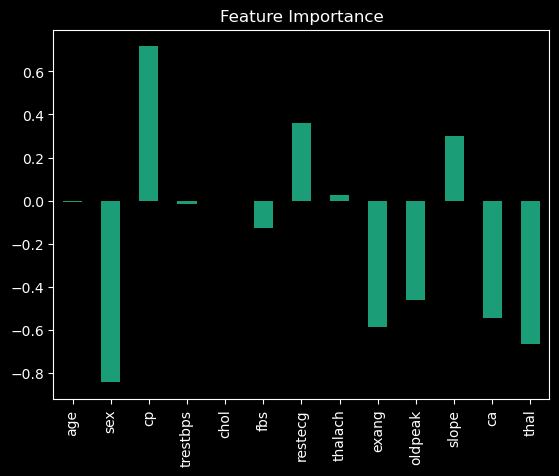

In [62]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, cmap="Dark2");

There are features that present a **positive correlation** <br>
* cp,
* restecg and 
* slope 

There are others that present a **negative correlation**
* age, 
* exang, 
* oldpeak, 
* ca and 
* thal

There are other features that do not look as important as the mentioned before: 
* age, 
* trestbps, 
* chol, 
* fbs and 
* thalach.

## Perspectives

* One option can be to reduce the features for the next fit, removing the less important features, with coef_ values close to 0.

## Conclutions

I should say that for me, it is surprising that the age is not an important feature. This is because the study group do not cover the real age spectrum.